In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import statsmodels.api as sm

In [46]:
df = pd.read_csv('PLASTIC_USE_7_08032023185107469.csv')
df
secondary = pd.DataFrame(df[df['PLASTIC_TYPES']== 'SECONDARY']['Value'])
primary = pd.DataFrame(df[df['PLASTIC_TYPES']== 'PRIMARY']['Value'])

In [48]:
secondary.reset_index(inplace = True)
primary.reset_index(inplace = True)

In [53]:
df_01 = df[df['Plastic types'] == 'Total']
df_01.drop(columns = ['PLASTIC_TYPES','Plastic types', 'TIME','Flag Codes', 'Flags'],
       inplace = True)
df_01

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_29913/4013009498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01.drop(columns = ['PLASTIC_TYPES','Plastic types', 'TIME','Flag Codes', 'Flags'],


,Time,Value
0,1990-1-1,129.887
1,1991-1-1,134.870
2,1992-1-1,143.569
3,1993-1-1,149.685
4,1994-1-1,164.447
5,1995-1-1,170.917
6,1996-1-1,183.440
7,1997-1-1,197.228
8,1998-1-1,206.397
9,1999-1-1,222.145


In [54]:
df_01['Time'] = pd.to_datetime(df_01['Time'], infer_datetime_format = True )

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_29913/2848632853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01['Time'] = pd.to_datetime(df_01['Time'], infer_datetime_format = True )


In [55]:
df_01 = df_01.set_index('Time')

In [57]:
secondary.index = df_01.index

In [58]:
primary.index = df_01.index

In [59]:
df_01['primary'] = primary['Value']
df_01['secondary'] = secondary['Value']

In [60]:
df_01

,Value,primary,secondary
Time,,,
1990-01-01,129.887,127.972,1.914
1991-01-01,134.870,132.687,2.183
1992-01-01,143.569,141.039,2.530
1993-01-01,149.685,146.833,2.853
1994-01-01,164.447,161.078,3.369
1995-01-01,170.917,167.172,3.745
1996-01-01,183.440,179.160,4.280
1997-01-01,197.228,192.348,4.880
1998-01-01,206.397,200.999,5.398


<AxesSubplot:xlabel='Time', ylabel='primary'>

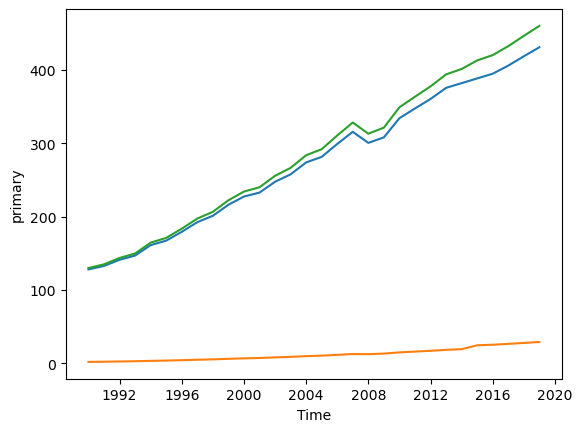

In [61]:
sns.lineplot(x="Time", y="primary", data=df_01)
sns.lineplot(x="Time", y="secondary",data=df_01)
sns.lineplot(x="Time", y="Value",data=df_01)